In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [12]:
image_path = r"C:\Users\Akshat Pandey\Downloads\Einstein.jpg" 
colored_image = Image.open(image_path)

gray_image = colored_image.convert("L")

gray_array = np.array(gray_image)

QUESTION 1

In [13]:
filter_backward_x = np.array([[-1, 1]])
filter_forward_x = np.array([[1, -1]])
filter_central_x = np.array([[-1,0, 1]])
#Making filters in x direction

In [14]:
filter_backward_y = np.array([[-1],[1]])
filter_forward_y = np.array([[1],[-1]])
filter_central_y = np.array([[-1],[0],[1]])
#Making filters in the y direction

In [15]:
#Padding for forward and backward derivative in y direction
padded_image_y = np.pad(gray_image, ((1, 0), (0, 0)), mode='constant')

#Padding for forward and backward derivative in x direction
padded_image_x = np.pad(gray_image, ((0, 0), (1, 0)), mode='constant')

In [17]:
def derivative(image, filter):
    
  image = np.array(image)
  filter = np.array(filter) 
    
  image_x, image_y = image.shape 
  filt_x, filt_y = filter.shape 
    
  out_img_x = image_x - filt_x + 1
  out_img_y = image_y - filt_y + 1
    
  out_img = np.zeros((out_img_x, out_img_y))
    
  for i in range(out_img_x):
      
    for j in range(out_img_y):
        
      img = image[i: i + filt_x, j: j + filt_y]
      out_img[i, j] = np.sum(filter * img)
        
  return out_img

In [18]:

fov_x = derivative(padded_image_x, filter_forward_x)
fov_y = derivative(padded_image_y, filter_forward_y)
back_x = derivative(padded_image_x, filter_backward_x)
back_y = derivative(padded_image_y, filter_backward_y)


In [19]:
from math import sqrt

def mag(image_x, image_y):
    
  x, y = image_x.shape 
  out_img= np.zeros((x, y))
    
  for i in range(x):
      
    for j in range(y):
      out_img[i, j]= sqrt((image_x[i,j] ** 2)+(image_y[i,j] ** 2))
        
  return out_img

In [21]:
fov_m = mag(fov_x, fov_y)

In [24]:
def direction(image_x, image_y):
    
  x,y= image_x.shape
  out_img = np.zeros((x,y))
    
  for i in range(x):
    for j in range(y):
      out_img[i,j] = np.arctan(image_y[i,j]/image_x[i,j])
  return out_img



In [25]:
fov_d = direction(fov_x, fov_y)

C:\Users\Akshat Pandey\AppData\Local\Temp\ipykernel_7768\1340489805.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  out_img[i,j] = np.arctan(image_y[i,j]/image_x[i,j])
C:\Users\Akshat Pandey\AppData\Local\Temp\ipykernel_7768\1340489805.py:8: RuntimeWarning: invalid value encountered in scalar divide
  out_img[i,j] = np.arctan(image_y[i,j]/image_x[i,j])


In [26]:
back_m = mag(back_x, back_y)
back_d = direction(back_x, back_y)

C:\Users\Akshat Pandey\AppData\Local\Temp\ipykernel_7768\1340489805.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  out_img[i,j] = np.arctan(image_y[i,j]/image_x[i,j])
C:\Users\Akshat Pandey\AppData\Local\Temp\ipykernel_7768\1340489805.py:8: RuntimeWarning: invalid value encountered in scalar divide
  out_img[i,j] = np.arctan(image_y[i,j]/image_x[i,j])


In [27]:
padded_cent_x = np.pad(gray_image,( (0,0),(1,1)))
padded_cent_y = np.pad(gray_image, ((1,1),(0,0)))

In [28]:
cent_x = derivative(padded_cent_x, filter_central_x)
cent_y = derivative(padded_cent_y, filter_central_y)

In [29]:
cent_m = mag(cent_x, cent_y)
cent_d = direction(cent_x, cent_y)

C:\Users\Akshat Pandey\AppData\Local\Temp\ipykernel_7768\1340489805.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  out_img[i,j] = np.arctan(image_y[i,j]/image_x[i,j])
C:\Users\Akshat Pandey\AppData\Local\Temp\ipykernel_7768\1340489805.py:8: RuntimeWarning: invalid value encountered in scalar divide
  out_img[i,j] = np.arctan(image_y[i,j]/image_x[i,j])


Text(0.5, 1.0, 'Central Gradient Direction')

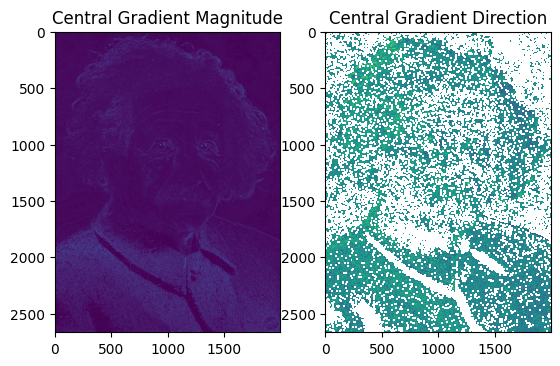

In [31]:
plt.subplot(1,2,1)
plt.imshow(cent_m)
plt.title('Central Gradient Magnitude')
    
plt.subplot(1,2,2)
plt.imshow(cent_d)
plt.title('Central Gradient Direction')


Text(0.5, 1.0, 'Forward Gradient Direction')

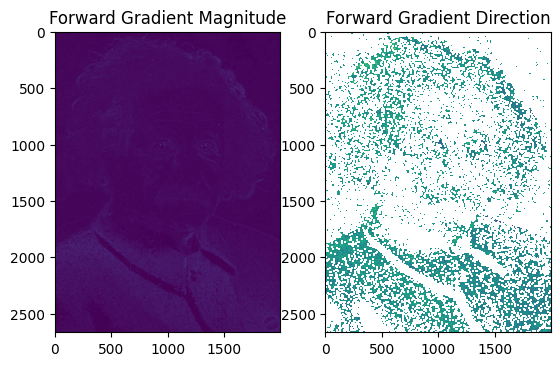

In [30]:
plt.subplot(1,2,1)
plt.imshow(fov_m)
plt.title('Forward Gradient Magnitude')
    
plt.subplot(1,2,2)
plt.imshow(fov_d)
plt.title('Forward Gradient Direction')

    
    

Text(0.5, 1.0, 'Backward Gradient Direction')

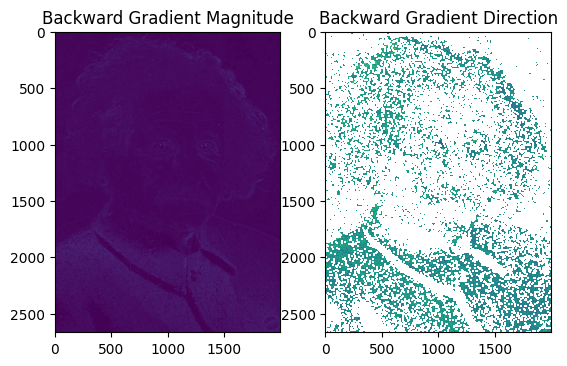

In [32]:
plt.subplot(1,2,1)
plt.imshow(back_m)
plt.title('Backward Gradient Magnitude')
    
plt.subplot(1,2,2)
plt.imshow(back_d)
plt.title('Backward Gradient Direction')

QUESTION 2

In [33]:
import cv2

def log(image):

    sigma = 2.0

    image_smoothed = cv2.GaussianBlur(image, (3, 3), sigma)

    image_log = cv2.Laplacian(image_smoothed, cv2.CV_64F)

    image_log = cv2.convertScaleAbs(image_log)

    plt.imshow(image_log)
    plt.title('LoG Image')
    plt.show()


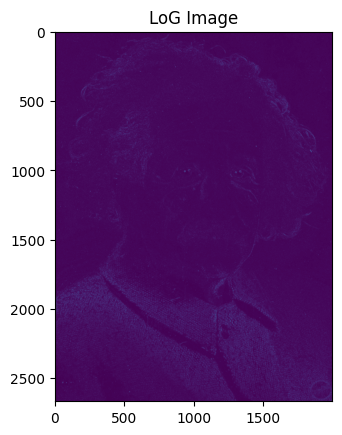

In [35]:
log(gray_array)

In [36]:
def dog(image):

    sigma1 = 1.0
    sigma2 = 2.0

    image_smoothed1 = cv2.GaussianBlur(image, (3, 3), sigma1)

    image_smoothed2 = cv2.GaussianBlur(image, (3, 3), sigma2)

    image_dog = image_smoothed1 - image_smoothed2


    image_dog = image_dog.astype(np.uint8)
    
    plt.imshow(image_dog)
    plt.title("DOG of an image") 
    

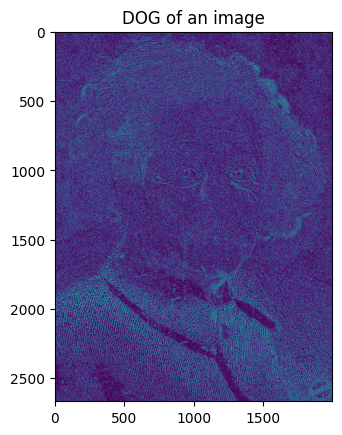

In [38]:
dog(gray_array)

In [41]:
def reduce(image, filter):
    image_x, image_y = image.shape 
    
    output_img_x = image_x//2
    output_img_y = image_y//2
   
    output_img = np.zeros((output_img_x, output_img_y))
    
    for i in range(1, output_img_x-1):
        for j in range(1, output_img_y-1):
            image_array = image[2*i-1:2*i+2,2*j-1:2*j+2]
            output_img[i,j] = np.sum(image_array * filter)
    return output_img

gauss_filter = np.array([[1/16, 2/16, 1/16],  # Making our gaussian filter
                        [2/16, 4/16, 2/16],
                        [1/16, 2/16, 1/16]])

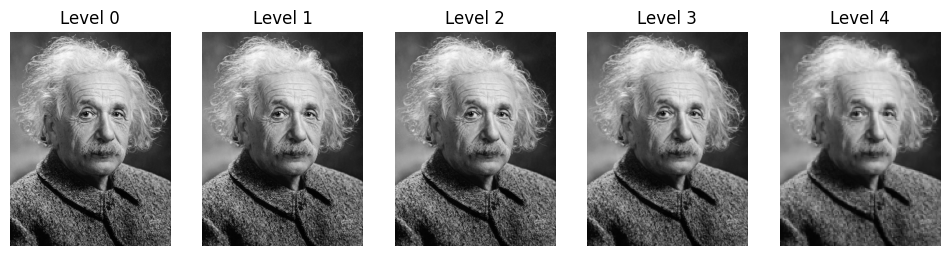

In [45]:

def gaussian_py(image):

    levels = 5

    
    pyramid = [image]

   
    for i in range(levels - 1):
        
        kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16.0
        smoothed = cv2.filter2D(pyramid[-1],-1, kernel)

       
        downsampled = smoothed[::2, ::2]

        
        pyramid.append(downsampled)

   
    plt.figure(figsize=(12, 6))

    for i, level in enumerate (pyramid):
    
        level_rgb = cv2.cvtColor(level, cv2.COLOR_BGR2RGB)


        plt.subplot(1,levels,i+1)
        plt.imshow(level_rgb)
        plt.title(f'Level {i}')
        plt.axis("off")

gaussian_py(gray_array)

QUESTION 3

In [56]:
def gaussian_py(image,num_levels = 10):
   
    pyramid = [image]

    for i in range(num_levels - 1):

        kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16.0
        smoothed = cv2.filter2D(pyramid[-1],-1, kernel)


        downsampled = smoothed[::2, ::2]


        pyramid.append(downsampled)
        
    return pyramid
 

def laplacian_py(pyramid):
    lap_pyramid=[]
    lap_pyramid.append(pyramid[-1])
    
    for i in range(len(pyramid)-1,0,-1):
        expanded = cv2.resize(pyramid[i], (pyramid[i-1].shape[1],pyramid[i-1].shape[0]))
        lap_layer = pyramid[i-1] - expanded 
        lap_pyramid.append(lap_layer)
  
    return lap_pyramid[::-1]   


def blend(lap_py1,lap_py2,mask_py,im1,im2):
    blend_array = []
    for i in range(len(lap_py1)):
        lap1 = lap_py1[i]
        lap2 = lap_py2[i]
        mask = mask_py[i]
        mask_reverse=1.0 - mask
       
        lap2 = cv2.resize(lap2, (lap1.shape[1], lap1.shape[0]))
    
        blend = lap1 * mask +  lap2 * mask_reverse 
        
        blend_array.append(blend)

    
    recon_image = blend_array[-1]

    for i in range(len(blend_array)-2,-1,-1):
        new_size = (blend_array[i].shape[1], blend_array[i].shape[0])
        recon_image = cv2.resize(recon_image, new_size) + blend_array[i]
    plt.figure(figsize=(15, 3)) 
    plt.subplot(1,3,1)    
    plt.imshow(im1)
    plt.title('APPLE')
    plt.axis('off')
    plt.subplot(1,3,2)    
    plt.imshow(im2)
    plt.title('ORANGE')
    plt.axis('off')
    plt.subplot(1,3,3)    
    plt.imshow(recon_image)
    plt.title('OUTPUT IMAGE (BLENDED)')
    plt.axis('off')
    


In [57]:
def blending(im1,im2):
    
    im1=cv2.resize(im1,(im2.shape[0],im2.shape[1]))

    mask = np.zeros_like(im1)

    mask[:, :im1.shape[1]//2] = 1 
   
    
    gauss_im1=gaussian_py(im1)
    gauss_im2=gaussian_py(im2)
    gauss_mask=gaussian_py(mask)
    
    
    lap_im1=laplacian_py(gauss_im1)
    lap_im2=laplacian_py(gauss_im2)
    
    
    blend(lap_im1,lap_im2,gauss_mask,im1,im2)
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


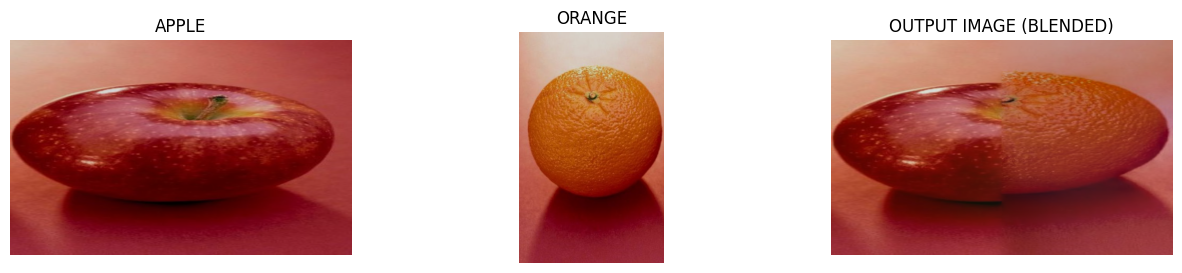

In [58]:
im1=cv2.imread(r"C:\Users\Akshat Pandey\Downloads\apple.jpeg")/300.0 #normalizing the values of image array
im2=cv2.imread(r"C:\Users\Akshat Pandey\Downloads\orange_1.jpeg")/300.0 #normalizing the values of image array


im1 = im1[:, :, ::-1]
im2 = im2[:, :, ::-1]


blending(im1,im2)
